# HLT Project - Dataset

For our purposes, the first step is to explore and clean where necessary the data we are going to work with. In this notebook we therefore set out to do just that: a brief but useful exploration of the data and its main characteristics, and a small part of data cleaning.


## Import Libraries

As a first step we import all the libraries that we will use in the course of our work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

## Utility Functions

As a second step we define some utility functions that we will use during the course of the notebook. Most of these functions will be used to plot different types of graphs, useful especially in the analysis part. We also include some functions that we use in the text cleaning part.

### Bar Chart

In [2]:
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    '''
    Function to create a bar chart with customizable parameters.

    Parameters:
    - data_to_plot: Data to be plotted on the bar chart.
    - figsize: Tuple specifying the figure size (default is (12,6)).
    - ticksrange: Range for the x-ticks (default is None).
    - ticksname: Names for the x-ticks (default is None).
    - title: Title of the bar chart (default is None).
    - xlabel: Label for the x-axis (default is None).
    - ylabel: Label for the y-axis (default is None).
    - color: Color of the bars (default is "blue").
    - rotation: Rotation angle for the x-tick labels (default is 0).
    - xscale: Scale for the x-axis (default is None).
    - yscale: Scale for the y-axis (default is None).
    - show_grid: Boolean to show grid lines (default is False).
    '''

    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set the x-ticks range and names if provided
    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
    
    # Set the scale for the x-axis if provided
    if xscale is not None:
        plt.xscale(xscale)
    
    # Set the scale for the y-axis if provided
    if yscale is not None:
        plt.yscale(yscale)

    # Show grid lines if specified
    if show_grid:
        plt.grid(True)

    plt.show()

### Histogram Plot

In [3]:
def sea_histogram(dataframe_to_plot, column_of_interest, figsize=(8,10), title=None, xlabel=None, 
                  ylabel=None, hue=None, palette="deep", stat="count", binwidth=None,
                  multiple="layer", element="step", fill=True, shrink=1, kde=False, color="blue", 
                  log_scale=None, ylog=False, xlog=False, show_grid=False):
    '''
    Function to create a histogram with customizable parameters using Seaborn.

    Parameters:
    - dataframe_to_plot: The dataframe containing the data to plot.
    - column_of_interest: The column in the dataframe to be plotted.
    - figsize: Tuple specifying the figure size (default is (8,10)).
    - title: Title of the histogram (default is None).
    - xlabel: Label for the x-axis (default is None).
    - ylabel: Label for the y-axis (default is None).
    - hue: Variable in dataframe to map plot aspects to different colors (default is None).
    - palette: Color palette for the hue variable (default is "deep").
    - stat: Aggregate statistic to compute in each bin (default is "count").
    - binwidth: Width of each bin (default is None).
    - multiple: How to display multiple elements (default is "layer").
    - element: Plotting style of histogram elements (default is "step").
    - fill: Whether to fill the histogram (default is True).
    - shrink: Proportion of the histogram width to shrink (default is 1).
    - kde: Whether to plot a kernel density estimate (default is False).
    - color: Color of the histogram (default is "blue").
    - log_scale: Log scaling of the axes (default is None).
    - ylog: Log scale for the y-axis (default is False).
    - xlog: Log scale for the x-axis (default is False).
    - show_grid: Boolean to show grid lines (default is False).
    '''

    plt.figure(figsize=figsize)
    
    # Plot the histogram with hue if provided
    if hue:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, hue=hue, stat=stat, 
                     binwidth=binwidth, multiple=multiple, element=element, fill=fill, 
                     shrink=shrink, kde=kde, palette=palette, log_scale=log_scale)
    # Plot the histogram without hue
    else:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, stat=stat, 
                     binwidth=binwidth, element=element, fill=fill,
                     shrink=shrink, kde=kde, color=color, log_scale=log_scale)
        
    # Apply log scale to y-axis if specified
    if ylog:
        plt.yscale("log")

    # Apply log scale to x-axis if specified
    if xlog:
        plt.xscale("log")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show grid lines if specified
    if show_grid:
        plt.grid(True)

    plt.show()

### Pie Plot

In [4]:
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    '''
    Function to create a pie plot with customizable parameters.

    Parameters:
    - value_counts_to_plot: Values to plot in the pie chart.
    - labels: Labels for each slice of the pie.
    - figsize: Tuple specifying the figure size (default is (8, 8)).
    - title: Title of the pie chart (default is None).
    - autopct_value: String format for displaying percentages on the pie slices (default is '%1.1f%%').
    - labeldistance: Radius at which the labels are drawn (default is 1.1).
    '''

    plt.figure(figsize=figsize)
    
    # Create the pie chart with percentages if specified
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    # Create the pie chart without percentages
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()

### Box Plot

In [5]:
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None):
    '''
    Function to create a boxplot with customizable parameters.

    Parameters:
    - columns_of_interest: List of column names to include in the boxplot.
    - data_frame: The DataFrame containing the data to plot.
    - whis: Whisker length to determine outliers (default is 1.5).
    - yscale: Scale of the y-axis, e.g., 'log' for logarithmic scale (default is None).
    - title: Title of the boxplot (default is None).
    '''

    data_frame.boxplot(column=columns_of_interest, whis=whis)
    
    # Set the y-axis scale if specified
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title)
    plt.show()


### WordCloud

In [6]:
def wordcloud_fun(dataset, data_to_plot, figsize=(20,20), max_words=2000,
                  min_font_size=10, height=800, width=1600, background_color="white"):
    '''
    Function to create and display a WordCloud from text data.

    Parameters:
    - dataset: DataFrame containing the data.
    - data_to_plot: Column name of the text data to generate the WordCloud from.
    - figsize: Size of the figure (default is (20, 20)).
    - max_words: Maximum number of words to display in the WordCloud (default is 2000).
    - min_font_size: Minimum font size for the WordCloud (default is 10).
    - height: Height of the WordCloud image (default is 800).
    - width: Width of the WordCloud image (default is 1600).
    - background_color: Background color of the WordCloud image (default is white).
    '''
  
    plt.figure(figsize=figsize)
    
    # Generate the WordCloud from the text data
    wc = WordCloud(max_words=max_words, min_font_size=min_font_size, height=height, width=width, 
                   background_color=background_color).generate(" ".join(dataset[data_to_plot]))
    
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

### Clean Text

In [7]:
def clean_text(df, field):
    '''
    Function to clean text data by removing special characters and converting to lower case.

    Parameters:
    - df: DataFrame containing the text data.
    - field: Column name of the text data to clean.

    Returns:
    - df: DataFrame with the cleaned text data.
    '''

    df[field] = df[field].str.replace(r"@", " at ")
    df[field] = df[field].str.replace("_", " ")
    df[field] = df[field].str.replace("-", " ")
    df[field] = df[field].str.replace(r'http\S*', '', regex=True)
    df[field] = df[field].str.replace(r"[^a-zA-Z0-9(),\"'\n\s.!?;:\[\]/%]", "", regex=True)
    df[field] = df[field].str.lower()
    
    return df


## Load Dataset

The `Amazon Reviews` dataset consists of reviews from Amazon. We then load this first dataset, which we save in the `df` dataframe.

In [8]:
data_path=("../Dataset/Amazon_Reviews.csv")
df = pd.read_csv(data_path, header=None, names=["polarity", "title", "text"])

The datasets contains 3 different columns: `polarity`, `title`, `text`. Here’s a brief description of these features:

- `polarity`: In this column, a number between 1 and 2 is written. In constructing the dataset, the label 1 was inserted for all negative reviews (those with 1 or 2 stars), while the label 2 was inserted for all positive reviews (4 or 5 stars). Reviews with 3 stars were ignored. 
- `title`: It contains the titles of the reviews.
- `text`: It contains the entire text of each review.

In [9]:
df.head()

polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                                text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

Let us print some information about this dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


## Cleaning Dataset

At this point move on to cleaning our dataset. As a first step we see if there are duplicate rows, but we do not find any duplicates to delete.

In [11]:
Duplicated_raws=df.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())
#Dataset_1_train=df.drop_duplicates() #in case of duplicates

The total number of duplicate rows are 0


Let us now check whether there are some null elements in some columns. 

As we can see, there are 207 null elements in the `title` column. Since we have to use this column during our analysis, we cannot have null elements. We are therefore going to delete the rows with null elements.

In [12]:
df.isna().sum()

polarity      0
title       207
text          0
dtype: int64

In [13]:
df=df.dropna()
df.isna().sum()

polarity    0
title       0
text        0
dtype: int64

We now go on to clean the text of special characters and also switch all uppercase to lowercase: in fact, our model will be able to work with lowercase. We will use the `clean_text` function defined in the Utility Function section.

In [14]:
clean_text(df,"title")
clean_text(df, "text")

df.head()

polarity                                              title  \
0         2                     stuning even for the non gamer   
1         2              the best soundtrack ever to anything.   
2         2                                           amazing!   
3         2                               excellent soundtrack   
4         2  remember, pull your jaw off the floor after he...   

                                                text  
0  this sound track was beautiful! it paints the ...  
1  i'm reading a lot of reviews saying that this ...  
2  this soundtrack is my favorite music of all ti...  
3  i truly like this soundtrack and i enjoy video...  
4  if you've played the game, you know how divine...

## Exploring Dataset

In [15]:
df.shape

(3599793, 3)

Let us look at the distribution of values in the `polarity` column. As we see these values are practically balanced.

In [16]:
df.polarity.value_counts()

polarity
2    1799913
1    1799880
Name: count, dtype: int64

In [17]:
rows_to_drop = df[df['polarity'] == 2].index
rows_to_drop = np.random.choice(rows_to_drop, size=33, replace=False)
df = df.drop(rows_to_drop)

df.polarity.value_counts()

polarity
2    1799880
1    1799880
Name: count, dtype: int64

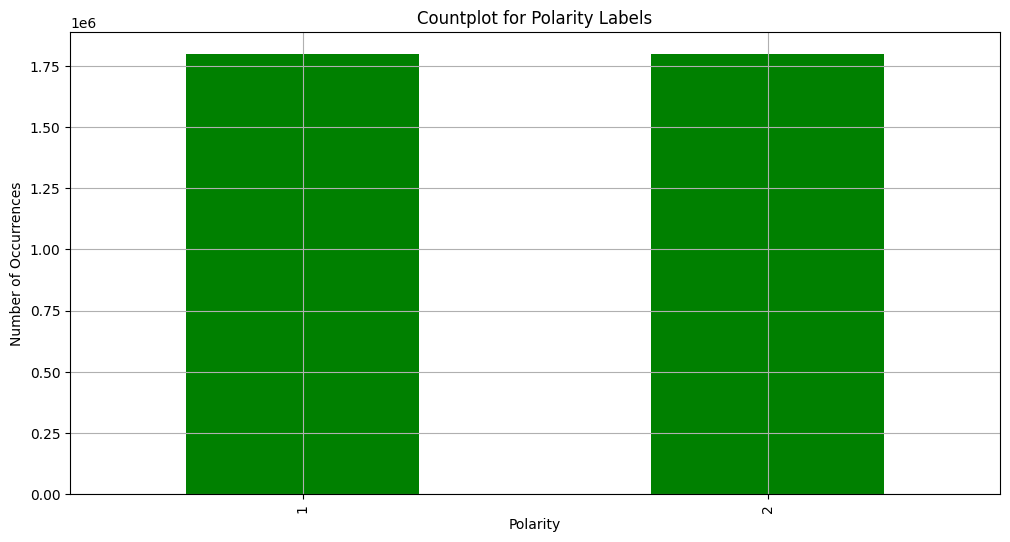

In [18]:
data_by_polarity = df.groupby('polarity').size()

barchart_func(data_to_plot=data_by_polarity,
              ticksrange=range(len(data_by_polarity)),
              ticksname=data_by_polarity.index,
              title='Countplot for Polarity Labels',
              xlabel="Polarity",
              ylabel="Number of Occurrences",
              color="green",
              rotation=90,
              #yscale=None,
              show_grid=True)

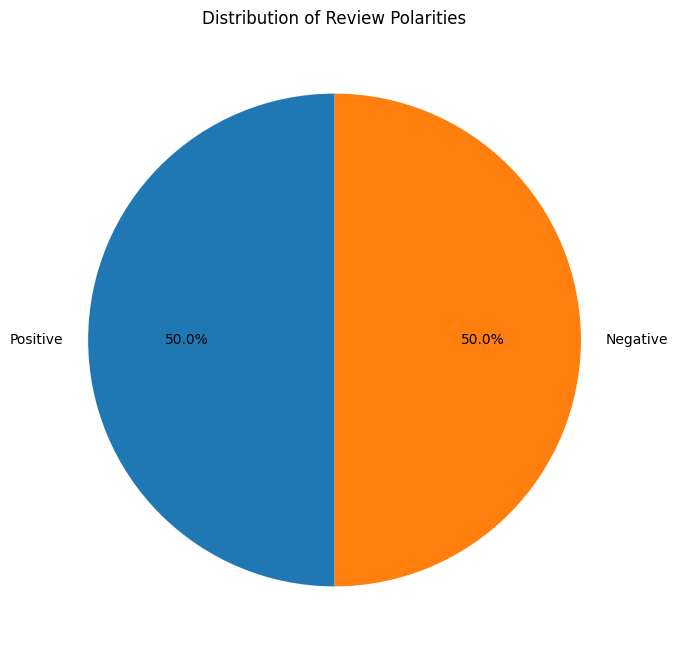

In [20]:
polarity_counts = df.polarity.value_counts()
labels = ['Positive', 'Negative']

pieplot_func(polarity_counts, labels, title='Distribution of Review Polarities')

### WordClouds on Reviews

Now we use `WordClouds`, that is useful for viewing and analyzing words that are frequently used. We first do that analysis on data with polarity equal to 1, so with bad reviews, and then to data with polarity equal to 2.

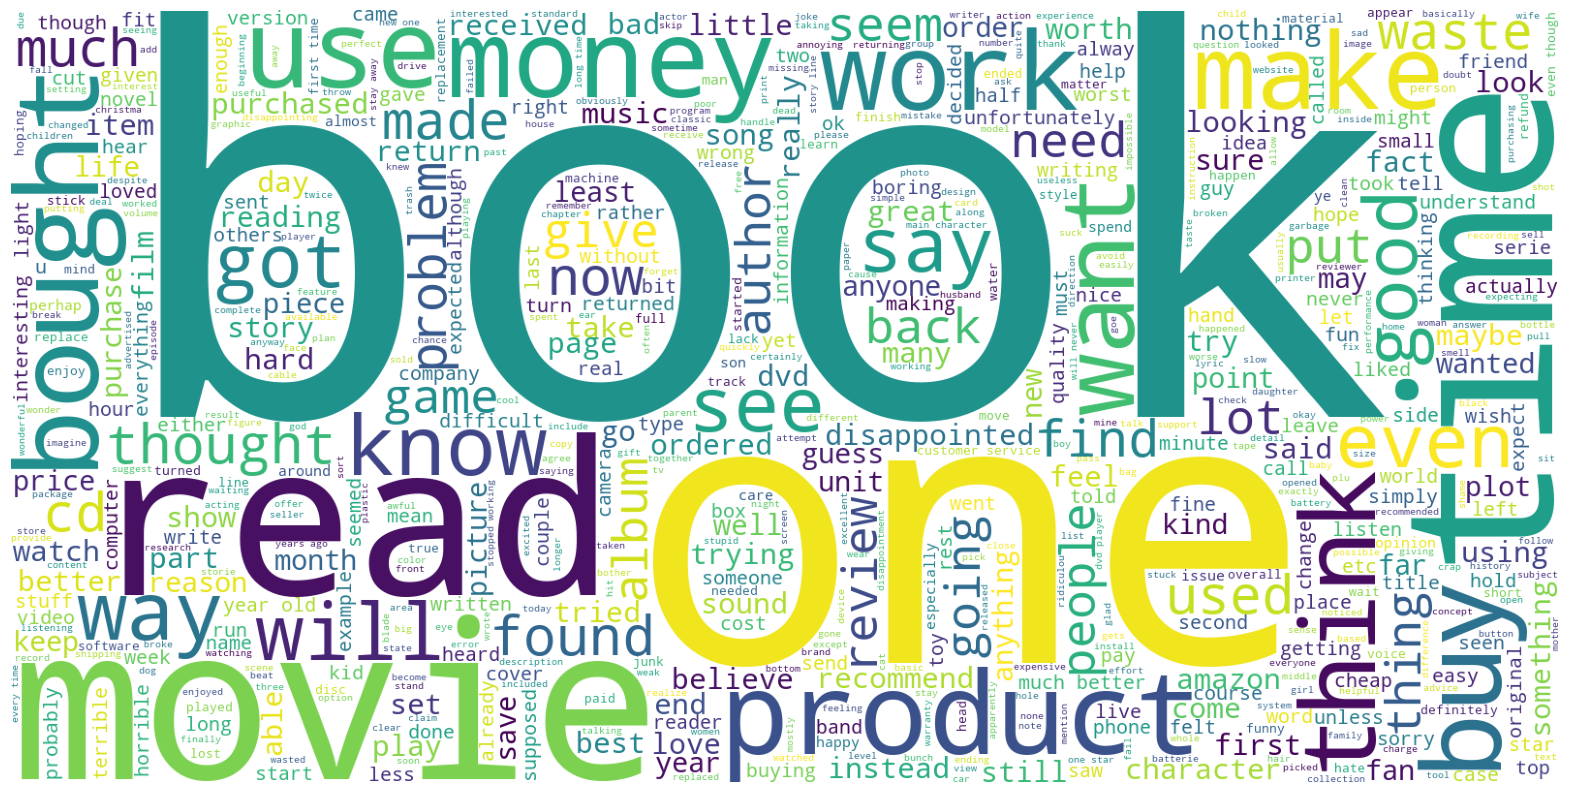

In [22]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 1]

wordcloud_fun(filtered_df, "text")

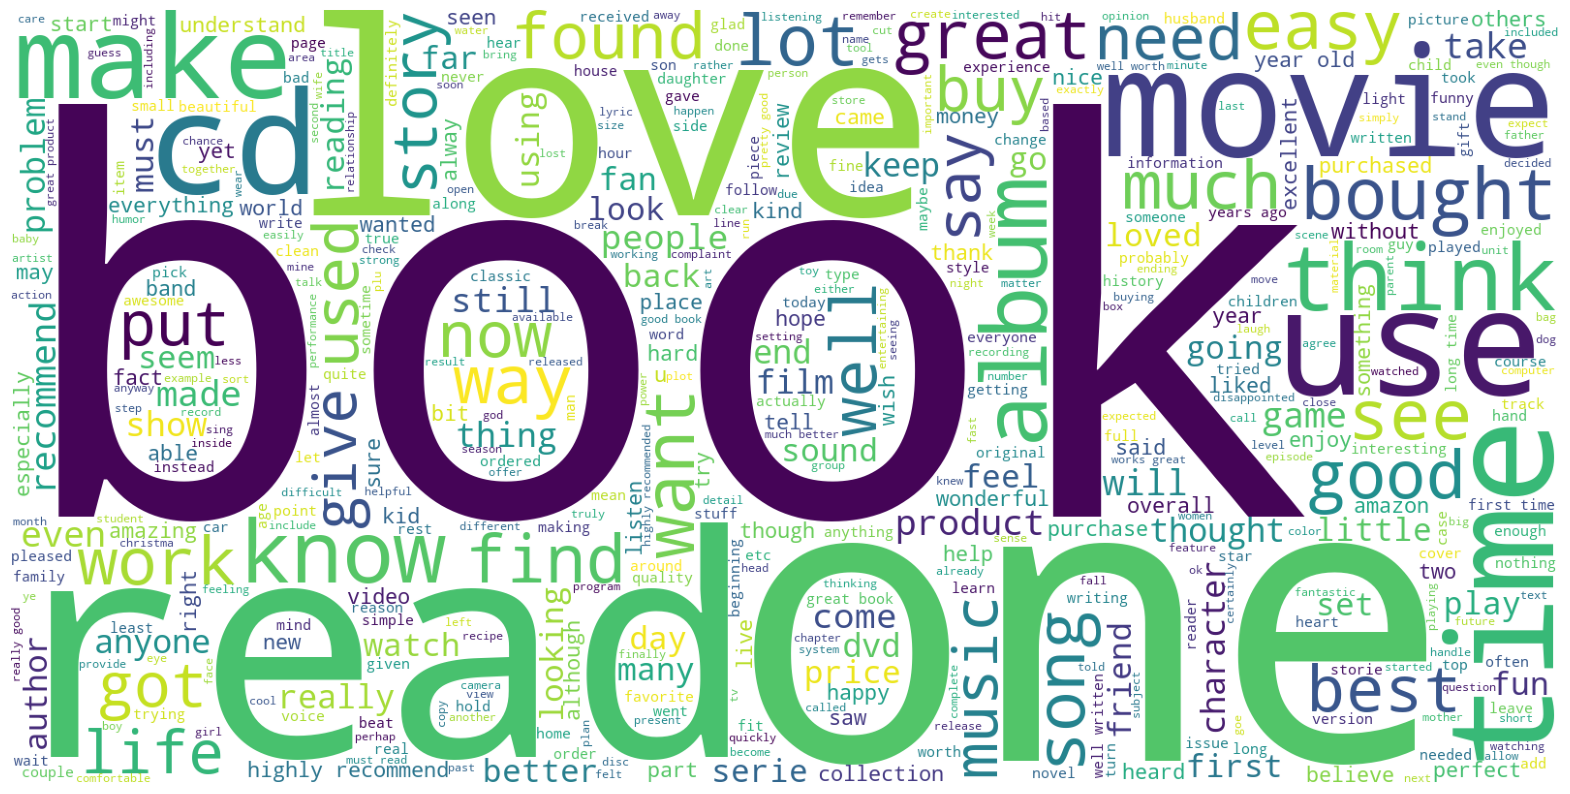

In [23]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 2]

wordcloud_fun(filtered_df, "text")

### WordClouds on Titles

We do the same operation as before, but in this case we use titles instead of entire reviews. Again, we first use `WordClouds` only to data with polarity equal to 1, and then only for data with polarity equal to 2.

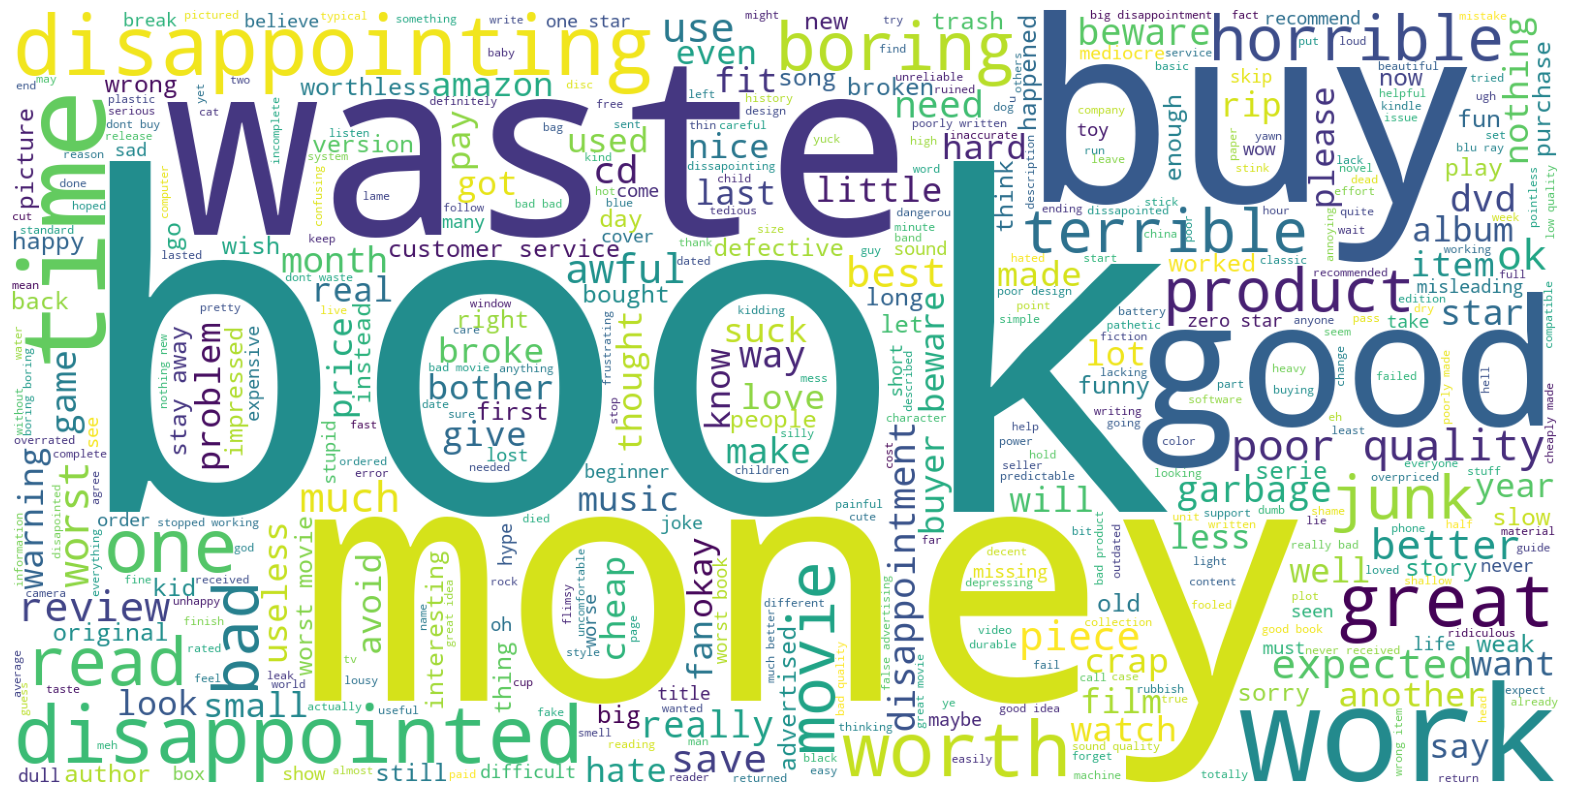

In [24]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 1]

wordcloud_fun(filtered_df, "title")

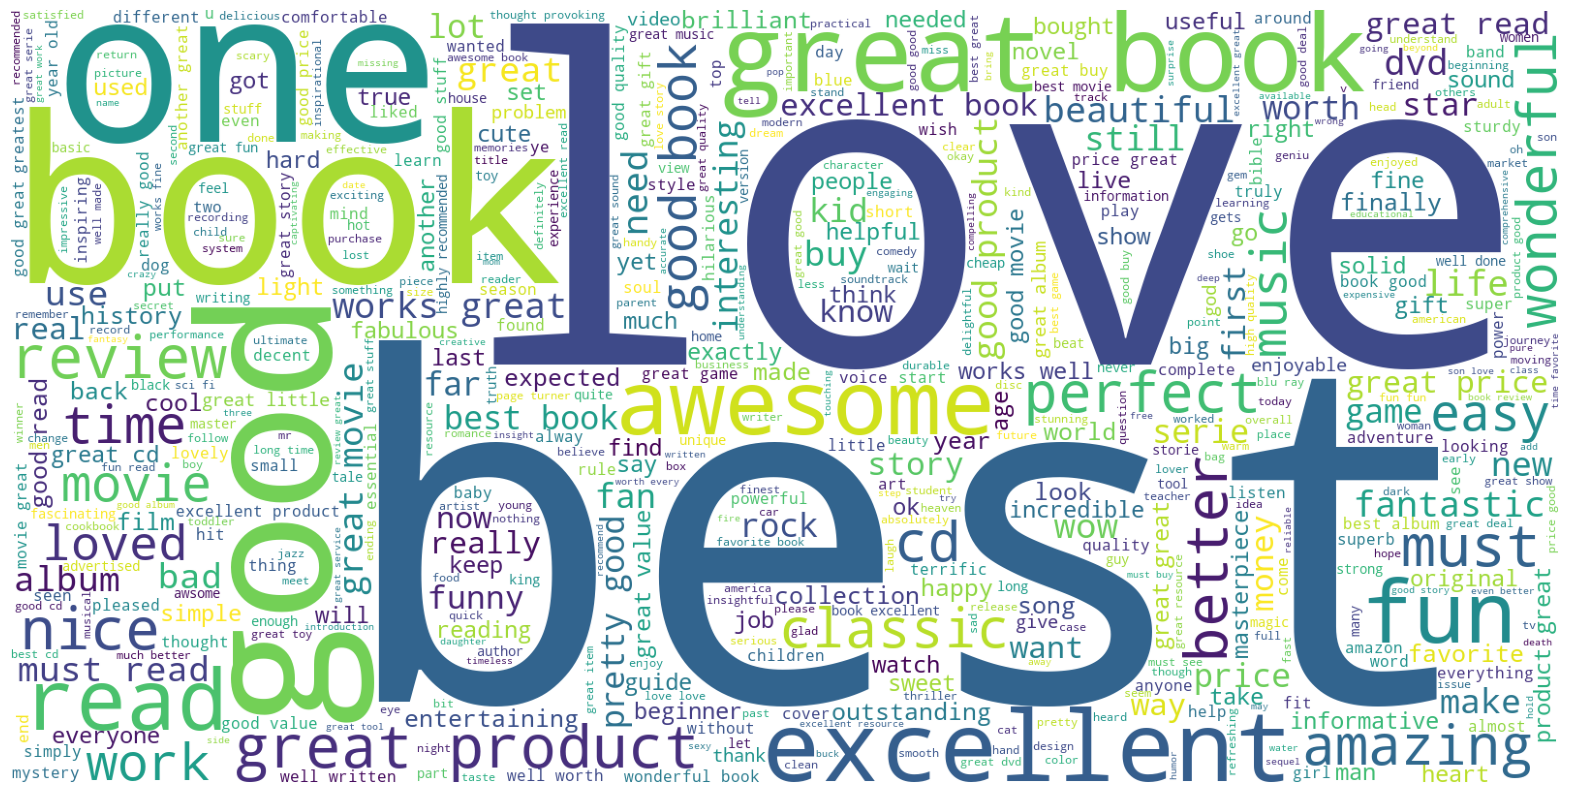

In [25]:
# Dataframe with polarity = 2
filtered_df = df[df['polarity'] == 2]

wordcloud_fun(filtered_df, "title")

### Length of Text

In this section we want to analyze the length of titles and reviews in our dataset. 

We first create two new columns, `title_word_count` and `review_word_count`, in which we respectively store the number of words in each title and the number of words in each review.

In [26]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split(' ')))
df['review_word_count'] = df['text'].apply(lambda x: len(x.split(' ')))

We first visualize the distributions of these new two columns plotting histograms using the `sea_histogram` function defined in the Utility Function section. 

`Title_word_count`: here we can see, through the first figure, how titles that have 2 to 5 words represent the most significant cases, and how the number of occurrences of titles with more than 5 words drops exponentially as the length of the title increases. 

In the second figure we print the same distribution, but using a logarithmic scale on the y-axis. We can see how, using the logarithmic scale, the descent of the figure is linear, and therefore exponential in the actual distribution (the one without the logarithmic scale).

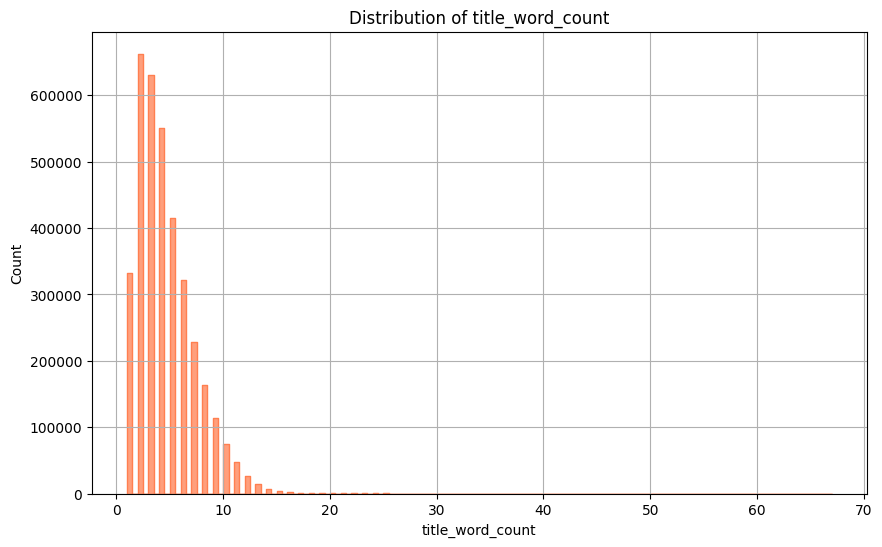

In [27]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              show_grid=True)

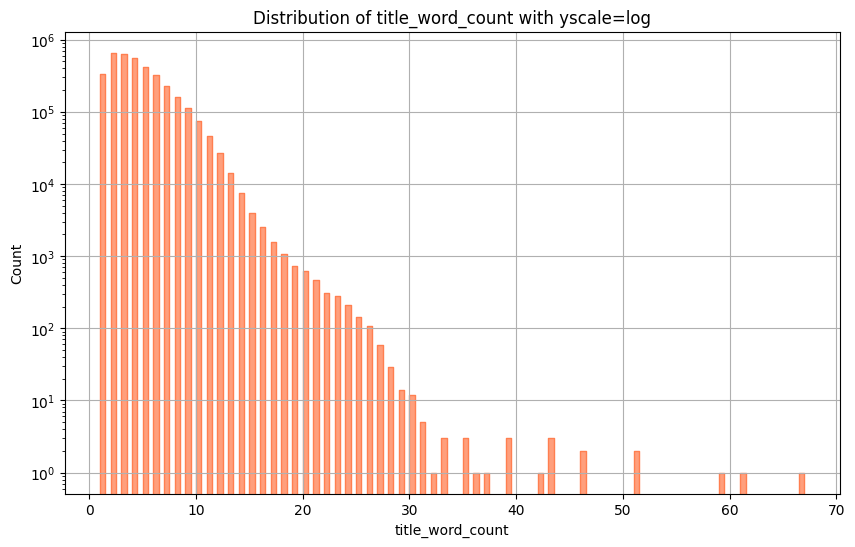

In [28]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count with yscale=log",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              ylog=True,
              show_grid=True)

`Review_word_count`: in the case of whole reviews, on the other hand, we see how the peak is for reviews about 20 words long. The descent of the curve shown in the figure is linear for reviews with more than 20 words: as the length of the reviews increases, the number of occurrences decreases linearly. For reviews shorter than 20 words in length, on the other hand, we have a super exponential decrease.

In the second figure we show the same graph, but studying its probability distribution, indicated both on the y-axis and by the curve visible in the figure.

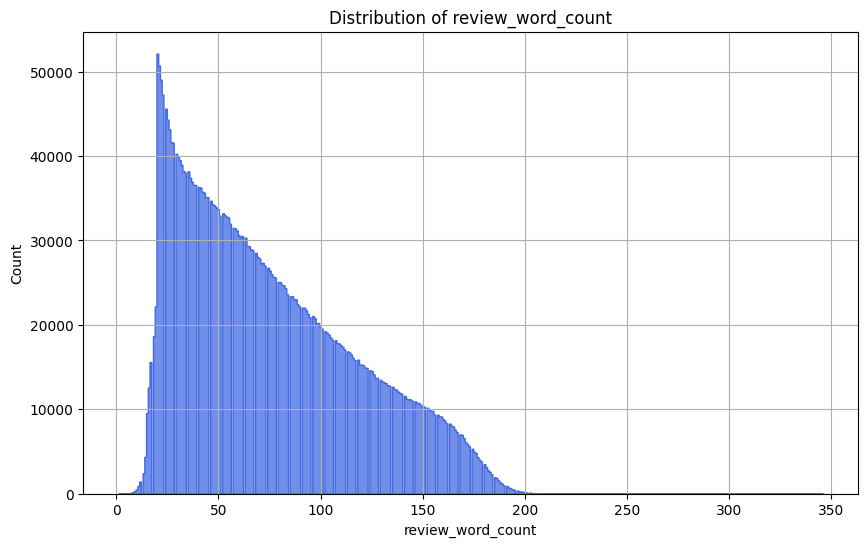

In [29]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              color="royalblue",
              show_grid=True)

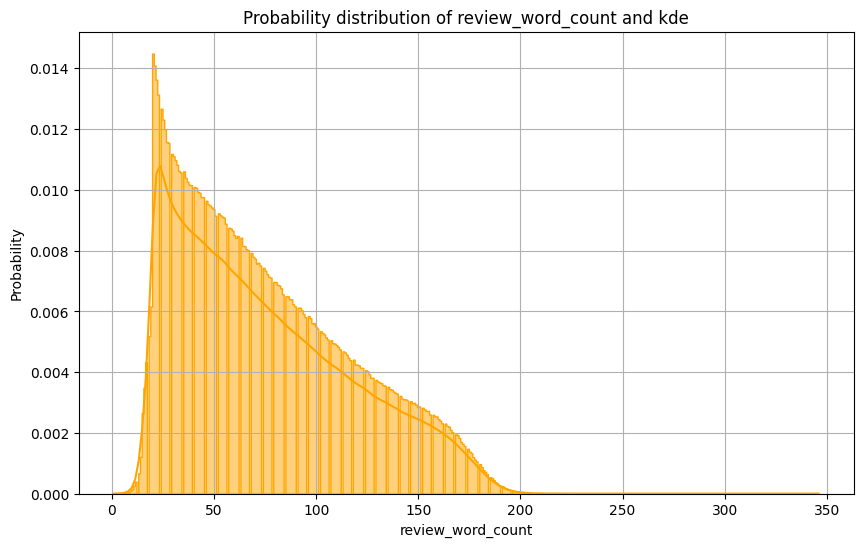

In [30]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Probability distribution of review_word_count and kde",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Probability",
              stat="probability",
              kde=True,
              color="orange",
              show_grid=True)

At this we print box plots for both columns to show another side of the distribution. We print the box plots with both linear and logarithmic scaling on the y-axis. 

From the figures we can see how the linear descent on the length of whole reviews causes no outliers to be detected in the `review_word_count` column. In contrast, the exponential descent on the occurrences of long titles causes the box plots to detect several outliers.

We decide not to eliminate these outliers, however, and use them for our classification task.

In [31]:
columns_of_interest=["title_word_count", "review_word_count"]

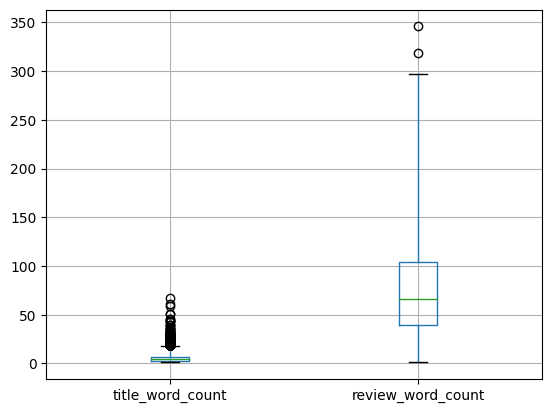

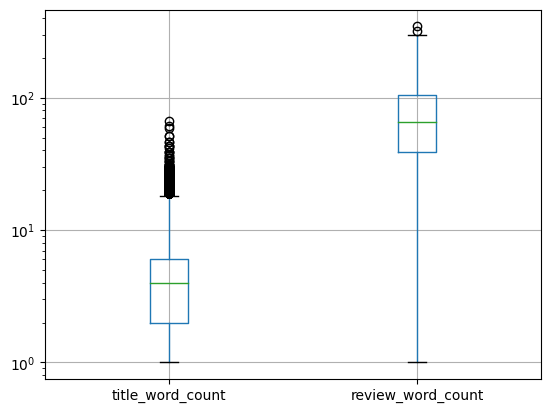

In [32]:
boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=df, 
             whis=3)

boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=df, 
             whis=3, 
             yscale="log")

At this point we ask, "*Is there a correlation between the length of reviews (or titles) and whether they are positive or not?*" For example, could it be the case that positive reviews, i.e., those associated with label 2 in the polarity column, are on average longer than negative reviews?

To answer this question we then printed histograms again, showing the distribution of the length of titles and reviews, i.e., the `title_word_count` and `review_word_count` columns, divided according to the labels in the `polarity` column. 

Looking at the graphs results the answer to our question was therefore: no. In fact, in this dataset the distribution of the length of titles and reviews is almost identical for both positive reviews (polarity=2) and negative reviews (polarity=1).

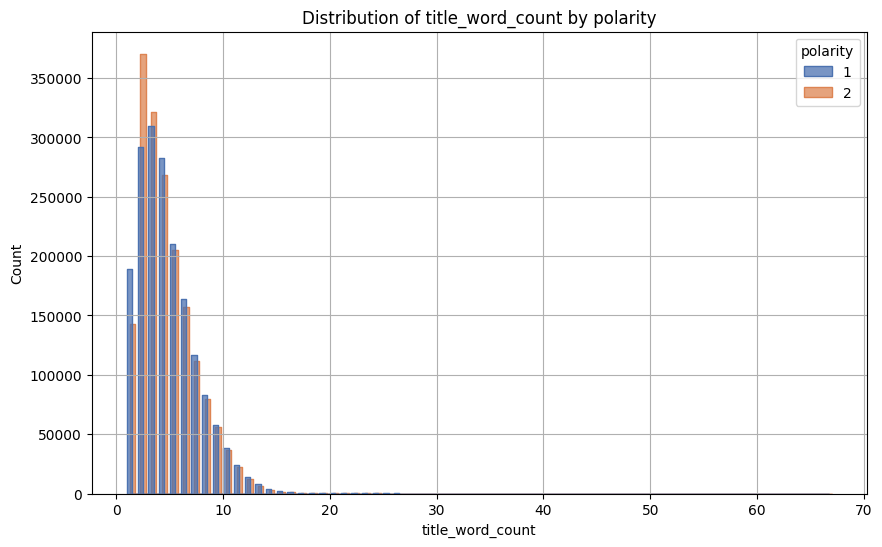

In [33]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count by polarity",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              hue="polarity",
              binwidth=0.5,
              multiple="dodge",
              element="step",
              #ylog=True,
              show_grid=True)

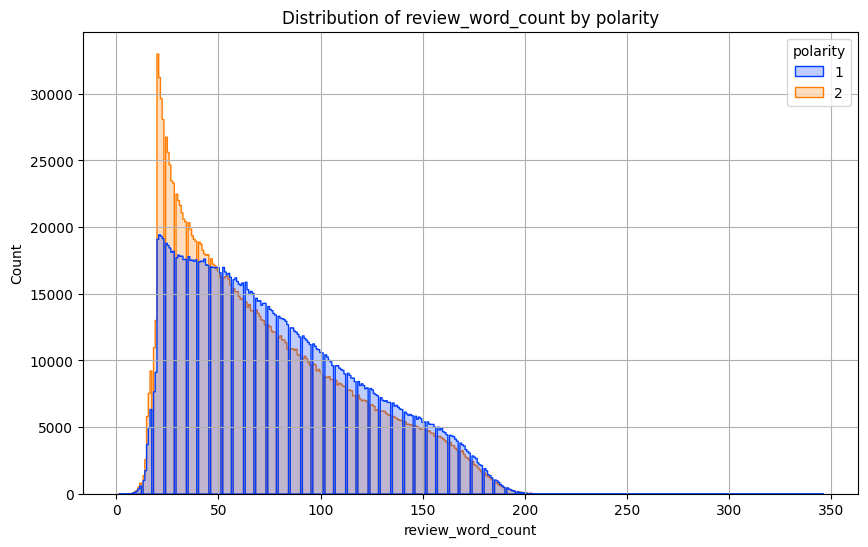

In [34]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count by polarity",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              hue="polarity",
              palette="bright",
              element="step",
              color="green",
              show_grid=True)

Finally, we remove the two columns defined at the beginning of the section, as we will not need them in future analyses.

In [35]:
df=df.drop(columns=["title_word_count", "review_word_count"])

## Storing Cleaned Datasets in csv Files

We now export the cleaned dataset to a new CSV, which we call `Dataset_cleaned.csv`, and save it following the path in the `folder_name` variable. 

In [40]:
#Get the directory of the script
script_directory = os.getcwd()

#Specify the folder name
folder_name = '../Dataset/Cleaned_Dataset'

#Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

#Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df.to_csv(path_or_buf=f'{folder_name}/Dataset_cleaned.csv', index=False)

### Reducing Size of Datasets

Because of the high computational costs of working with a dataset with one million rows, and because of the limited time we can devote to training the model on the servers made available, we decide to lower the dimensionality of the dataset. 

In particular, we decide to create a subdataset with 200,000 rows. To do this we do not want to lose the feature of balancing the dataset along the `polarity` column: so we decide by hand to take 100,000 random rows from the dataset where polarity=1 and 100,000 random rows where polarity=2. We thus create the new subDataFrame, called `new_df`.

In [41]:
num_polarity_1 = (df['polarity'] == 1).sum()
num_polarity_2 = (df['polarity'] == 2).sum()

sample_polarity_1 = df[df['polarity'] == 1].sample(n=100000)
sample_polarity_2 = df[df['polarity'] == 2].sample(n=100000)

new_df = pd.concat([sample_polarity_1, sample_polarity_2])

In [42]:
new_df = new_df.reset_index(drop=True)

In [43]:
new_df.isna().sum()

polarity    0
title       0
text        0
dtype: int64

Again, we export our subDataFrame to a new CSV file with the name `Dataset_final.csv`, using the folder indicated by the `folder_name` variable as the destination folder.

In [45]:
#Get the directory of the script
script_directory = os.getcwd()

#Specify the folder name
folder_name = '../Final_Dataset'

#Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

#Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

new_df.to_csv(path_or_buf=f'{folder_name}/Dataset_final.csv', index=False)

## Conclusion

In this notebook, we explored the dataset for our project. We analyzed the data, ensuring it was balanced regarding the classification task column, and cleaned it as necessary. We visualized some interesting results using `WordClouds` and `seaborn.histplots`. Finally, we saved the cleaned data to a new CSV file. In the next steps, we'll import this cleaned data and proceed with our Sentiment Analysis and Topic Modeling tasks.